In [1]:
# ruby code required

def bitPattern(num):
    num_dic = {nu:list() for nu in num}
    
    for idx, nu in enumerate(num):
        num_dic[nu].append(idx)
        
    lst1, lst2 = [], []
    
    for idx, nu in enumerate(num):
        current_idx = idx
        if current_idx > num_dic[nu][0] and current_idx < num_dic[nu][-1]:
            lst1.append('1')
            lst2.append('1')
        elif current_idx > num_dic[nu][0]:
            lst1.append('1')
            lst2.append('0')
        elif current_idx < num_dic[nu][-1]:
            lst2.append('1')
            lst1.append('0')
        else:
            lst1.append('0')
            lst2.append('0')
    
    return ["".join(lst1), "".join(lst2)]


# main
num = [1, 3, 2, 3, 4, 1]
print(bitPattern(num))

['000101', '110000']


In [2]:
!pip install py2rb

## Task 1

+ Import the necessary libs: `matplotlib` and `numpy`.
+ Create a varible `N` with value 70.
+ Create a numpy array `x` with evenly spaced integers ranging from `0.` to `10.` of size `N`. 
+ Create a numpy array named `y` with values obtained by the formula sin^{2}(x) - cos^{2}(x). (Using array `x`)
+ Create a figure object named `fig1` with figure size `7x5`.
+ Create a scatterplot with `x` and `y` as the features with size set to 15 and label set to y = sin^2(x) - cos^2(x).
+ Update the plot such that the axis are equal, and the legend is being displayed.
+ Set x-label as 'x (rad)' and y-label as 'y'.
+ Finally display the graph.

In [3]:
# Import statements here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
N = 70

x = np.array(np.linspace(0, 10, N))
y = np.array([np.sin(x_)**2 - np.cos(x_)**2 for x_ in x])


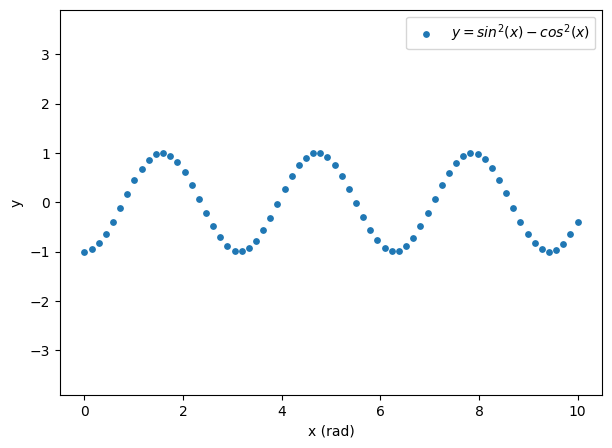

In [5]:
plt.subplots(figsize=(7, 5))
fig1 = plt.scatter(x, y, 15, label = "$y = sin^2(x) - cos^2(x)$")
plt.legend(loc='upper right')
# plt.xlim(0, 10)
# plt.ylim(-3, 3)
plt.axis('equal')
plt.xlabel("x (rad)")
plt.ylabel("y")
plt.show()

## Task 2

+ For the second graph: initially set the seed value to 100.
+ Set `N` to 50.
+ Generate random values (of float type) of size `N` where each value is multiplied by `100` and store it in a numpy array named `rand_x`.
+ Similarly to `rand_x`, generate random values (of float type) of size `N` where each value is multiplied by `100` and store it in a numpy array named `rand_y`.
+ Create a figure object `fig2` of size `7x6`.
+ Generate a scatter plot using the features `rand_x` and `rand_y` with marker set to `tri_right`, color set to dark orange and size to 100.
+ Adjust the plot axis to be equal.
+ Label the x-axis as `rand_x` and y-axis as `rand_y`.
+ Enable grid to the plot along with layout as tight.
+ Finally display the graph.

In [6]:
np.random.seed(100)
N = 50
rand_x = np.array(np.random.random(size=N) * 100)
rand_y = np.array(np.random.random(size=N) * 100)

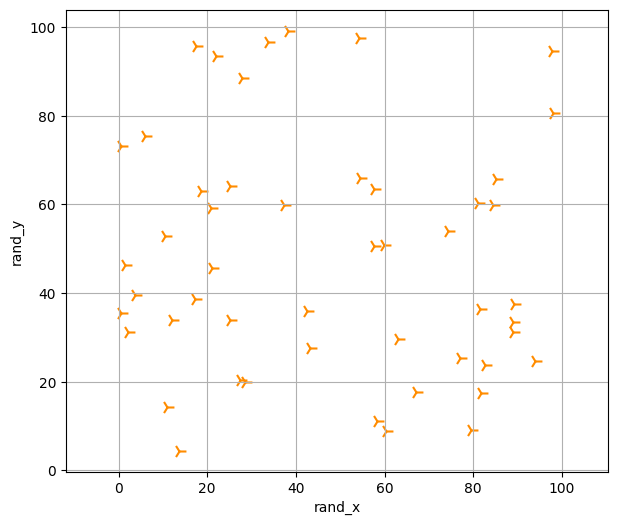

In [7]:
plt.subplots(figsize=(7, 6))
fig2 = plt.scatter(rand_x, rand_y, 100, color = "darkorange", marker = "4")
plt.axis('equal')
plt.xlabel("rand_x")
plt.ylabel("rand_y")
plt.grid(visible=True)
plt.show()